In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
plt.style.use(['science','no-latex'])
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# import the modules
# import sys
# sys.path.append('../')
import estimator as es

In [57]:
# load the fiducial data
# ISS(LEO) dt=240, skiprows=40
# COSMOS-2468(LEO), MTCube(MEO), GALAXY-32(GEO) dt=60, skiprows=14

dataset = 'GALAXY'
propagator = ['SV','RK4','orekit']

days=3
dt = 60
trange =np.arange(0,86400*days,dt)
nrange = int(86400*days/dt)
print(nrange)

stateVec0 = np.loadtxt(r'./data/{}.oem'.format(dataset),skiprows = 14,usecols=(1,2,3,4,5,6),max_rows=nrange)*1000
altitude0 = np.array([es.altitude(i) for i in stateVec0])/1000
distOrekit = []

data_SV = np.loadtxt(r'./data/{}_SV.out'.format(dataset))
stateVec_SV = es.dataCut(trange,data_SV)
altitude_SV = np.array([es.altitude(i) for i in stateVec_SV])/1000
distSV = []

data_RK = np.loadtxt(r'./data/{}_RK4.out'.format(dataset))
stateVec_RK = es.dataCut(trange,data_RK)
altitude_RK = np.array([es.altitude(i) for i in stateVec_RK])/1000
distRK4 = []

stateVec_orekit = np.loadtxt(r'./data/{}_orekit.out'.format(dataset),skiprows=1,usecols=(1,2,3,4,5,6))
altitude_orekit = np.array([es.altitude(i) for i in stateVec_orekit])/1000
distOrekit = []

for i in range(nrange):
    distOrekit.append(es.distance(stateVec0[i],stateVec_orekit[i])/1000)
    distRK4.append(es.distance(stateVec0[i],stateVec_RK[i])/1000)
    distSV.append(es.distance(stateVec0[i],stateVec_SV[i])/1000)

4320


Period in [min]:
ISS: 974.30089
SV: 974.79645
RK4: 974.79643
Orekit 974.30621


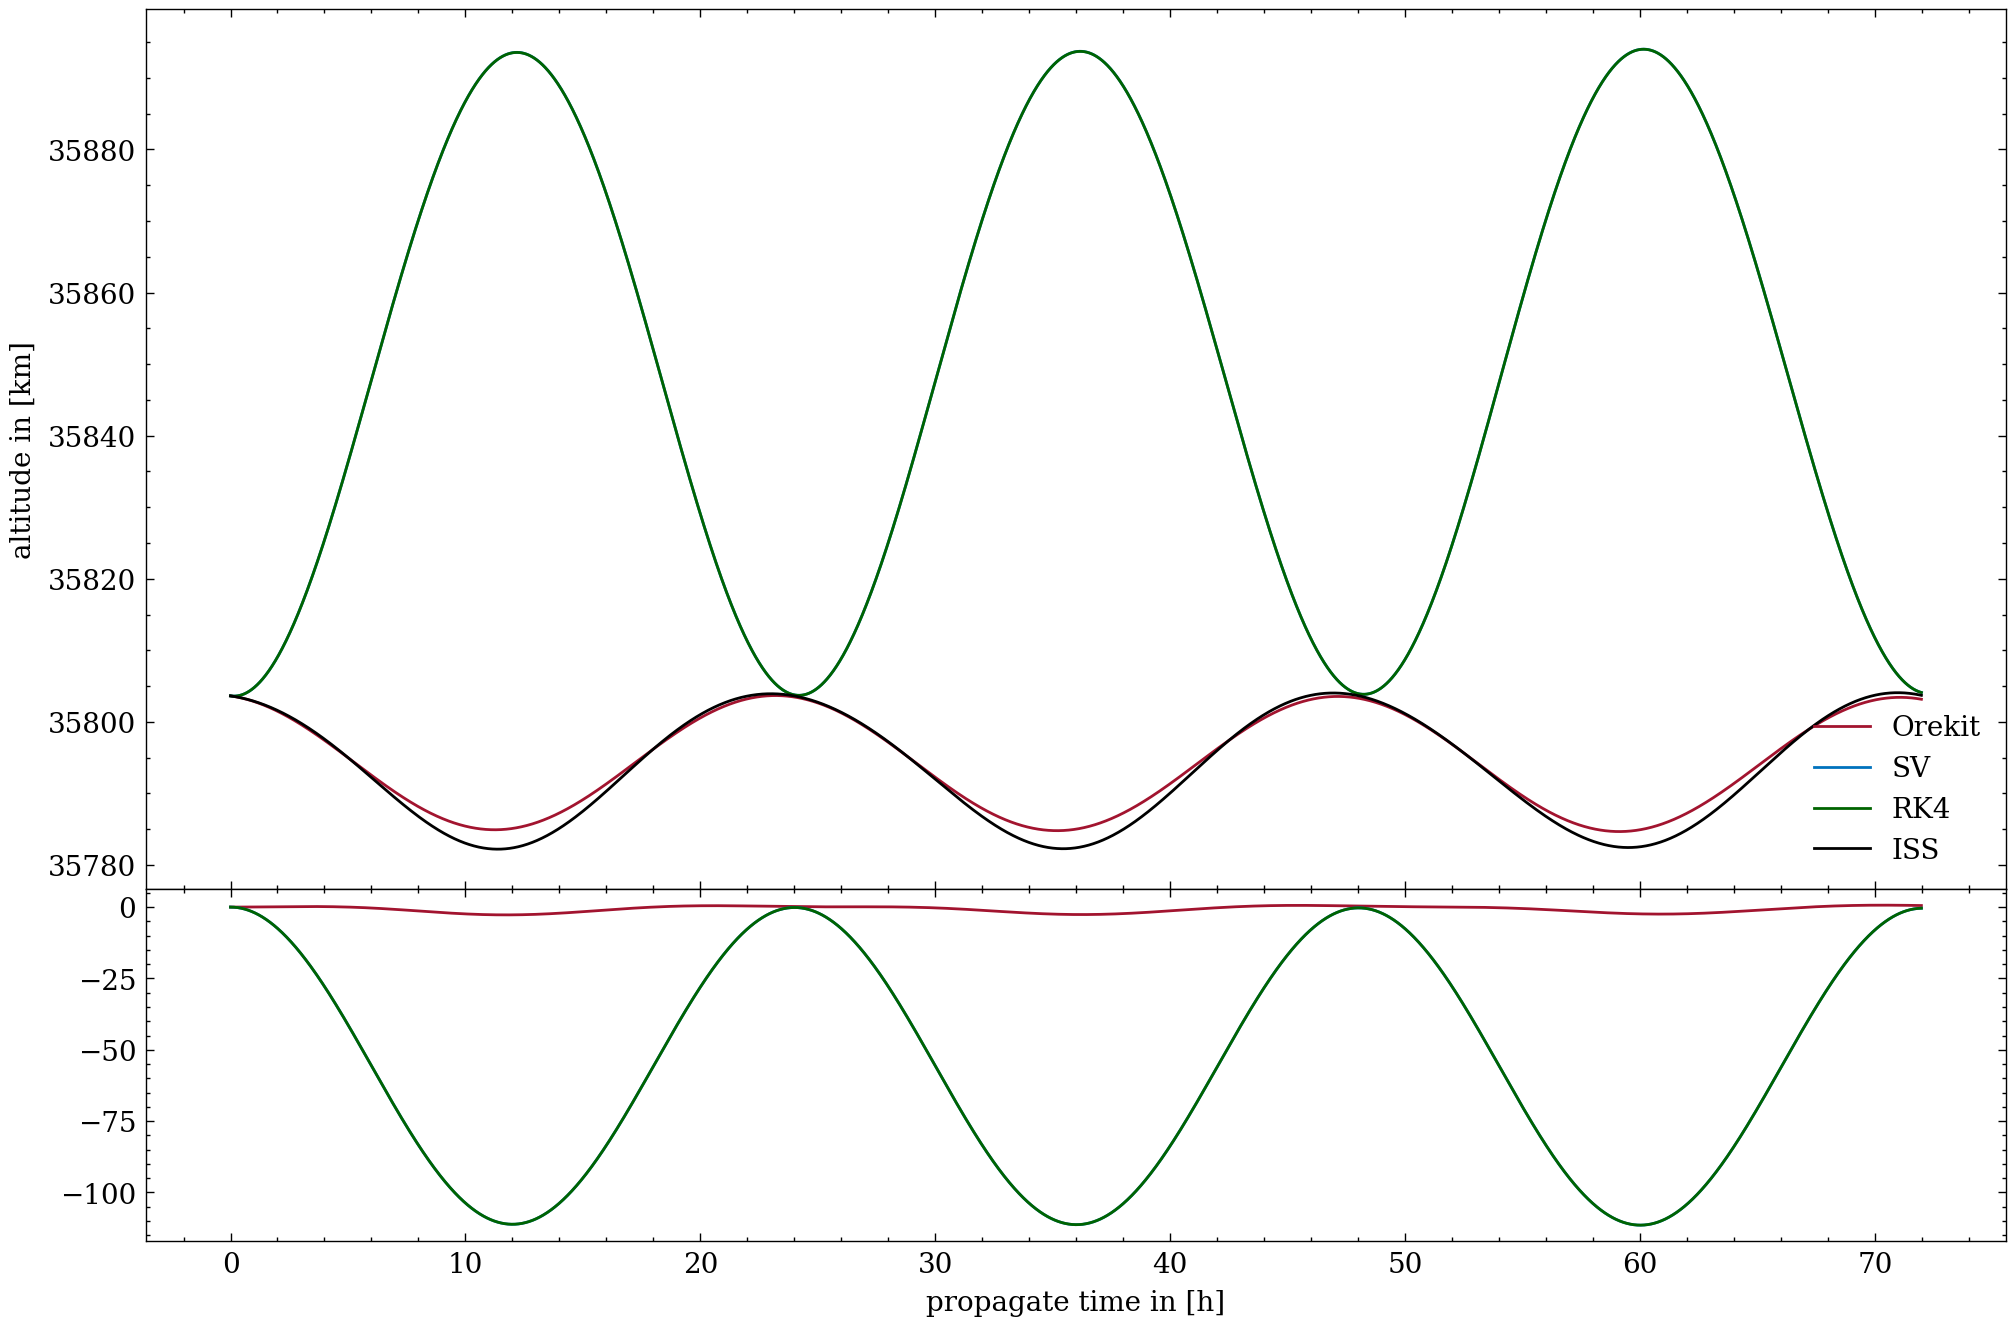

In [62]:
# compare the altitude and period
a=4320

print('Period in [min]:')
print('ISS:',es.period(stateVec0[:,0],dt)/60)
print('SV:',es.period(stateVec_SV[:,0],dt)/60)
print('RK4:',es.period(stateVec_RK[:,0],dt)/60)
print('Orekit',es.period(stateVec_orekit[:,0],dt)/60)

fig = plt.figure(figsize=(12,8))
spec = gridspec.GridSpec(nrows=2,ncols=1, height_ratios=[5, 2], wspace=0.2,hspace=0)
ax = np.empty((2), dtype=type(plt.axes))

ax[0] = fig.add_subplot(spec[0])
ax[0].plot(trange[0:a]/3600,altitude_orekit[0:a],color='#A2142F',label='Orekit')
ax[0].plot(trange[0:a]/3600,altitude_SV[0:a],color='#0072BD',label='SV')
ax[0].plot(trange[0:a]/3600,altitude_RK[0:a],color='#006400',label='RK4')
ax[0].plot(trange[0:a]/3600,altitude0[0:a],color='black',label='ISS')
ax[0].legend(loc=4)

ax[1] = fig.add_subplot(spec[1])
ax[1].plot(trange[0:a]/3600,altitude0[0:a]-altitude_orekit[0:a],color='#A2142F',label='Orekit')
ax[1].plot(trange[0:a]/3600,altitude0[0:a]-altitude_SV[0:a],color='#0072BD',label='SV')
ax[1].plot(trange[0:a]/3600,altitude0[0:a]-altitude_RK[0:a],color='#006400',label='RK')

ax[0].set_ylabel('altitude in [km]')
ax[1].set_xlabel('propagate time in [h]')

plt.show()

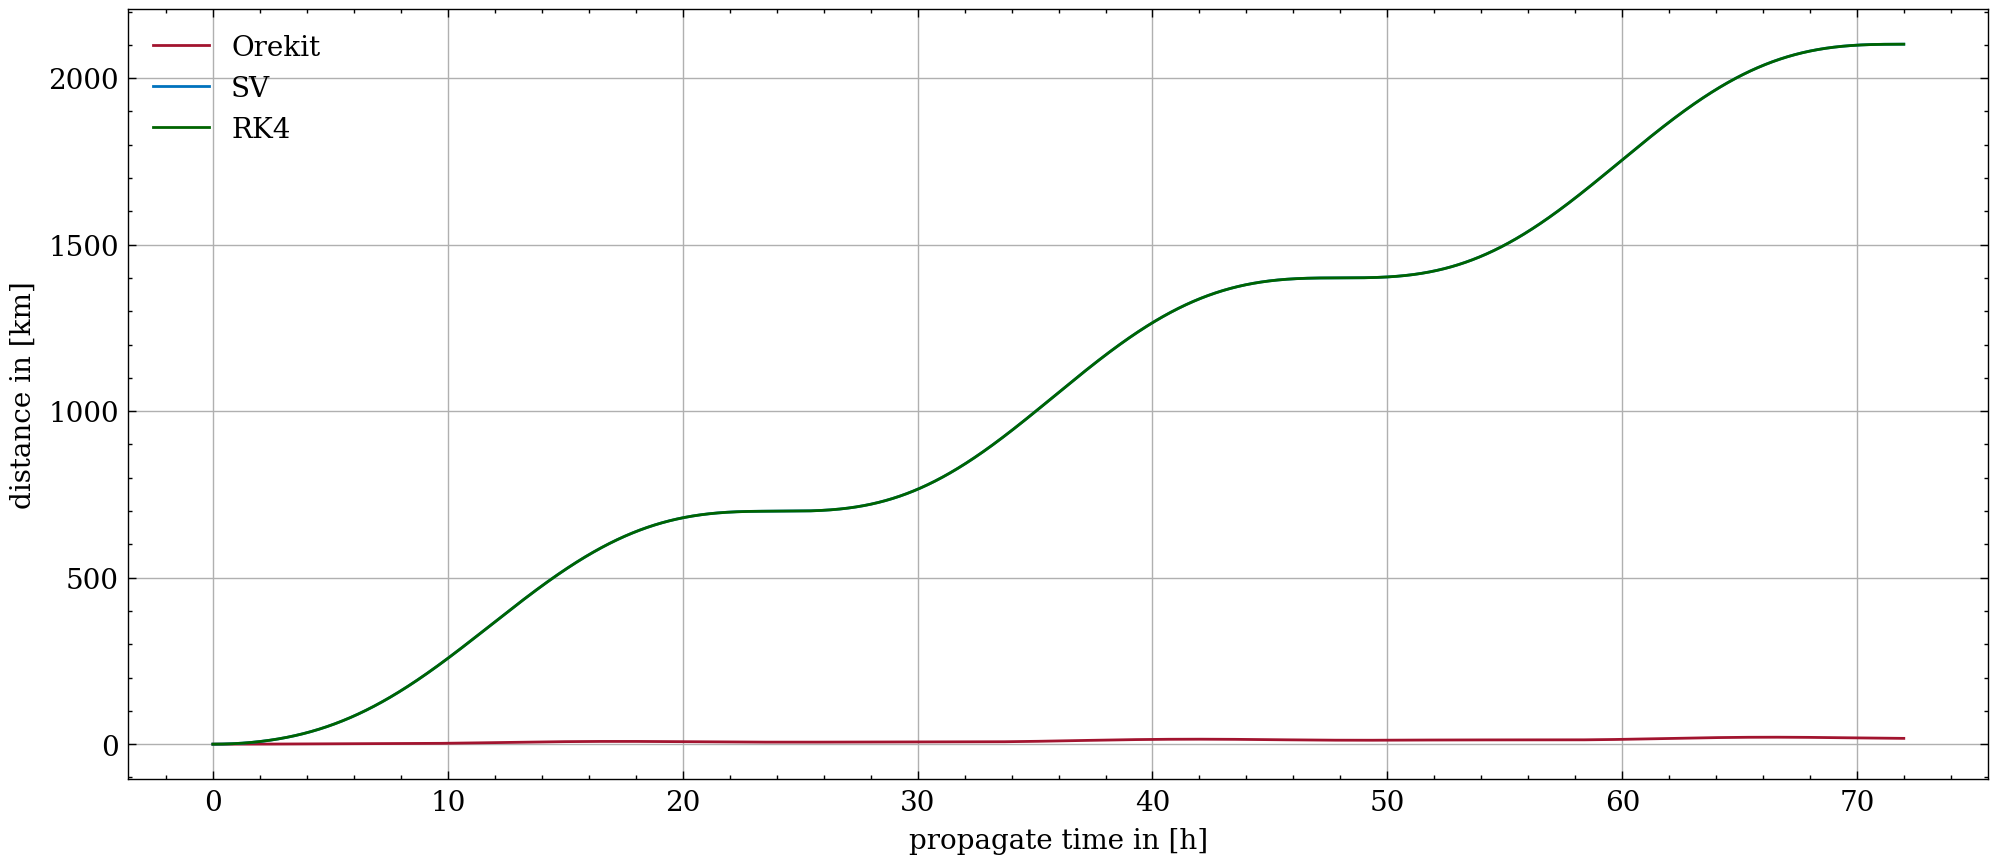

In [63]:
plt.figure(figsize=(12,5))
plt.plot(trange[0:a]/3600,distOrekit[0:a],color='#A2142F',label='Orekit')#006400
plt.plot(trange[0:a]/3600,distSV[0:a],color='#0072BD',label='SV')
plt.plot(trange[0:a]/3600,distRK4[0:a],color='#006400',label='RK4')
plt.legend(loc=2)
plt.ylabel('distance in [km]')
plt.xlabel('propagate time in [h]')
plt.grid(1)

plt.show()

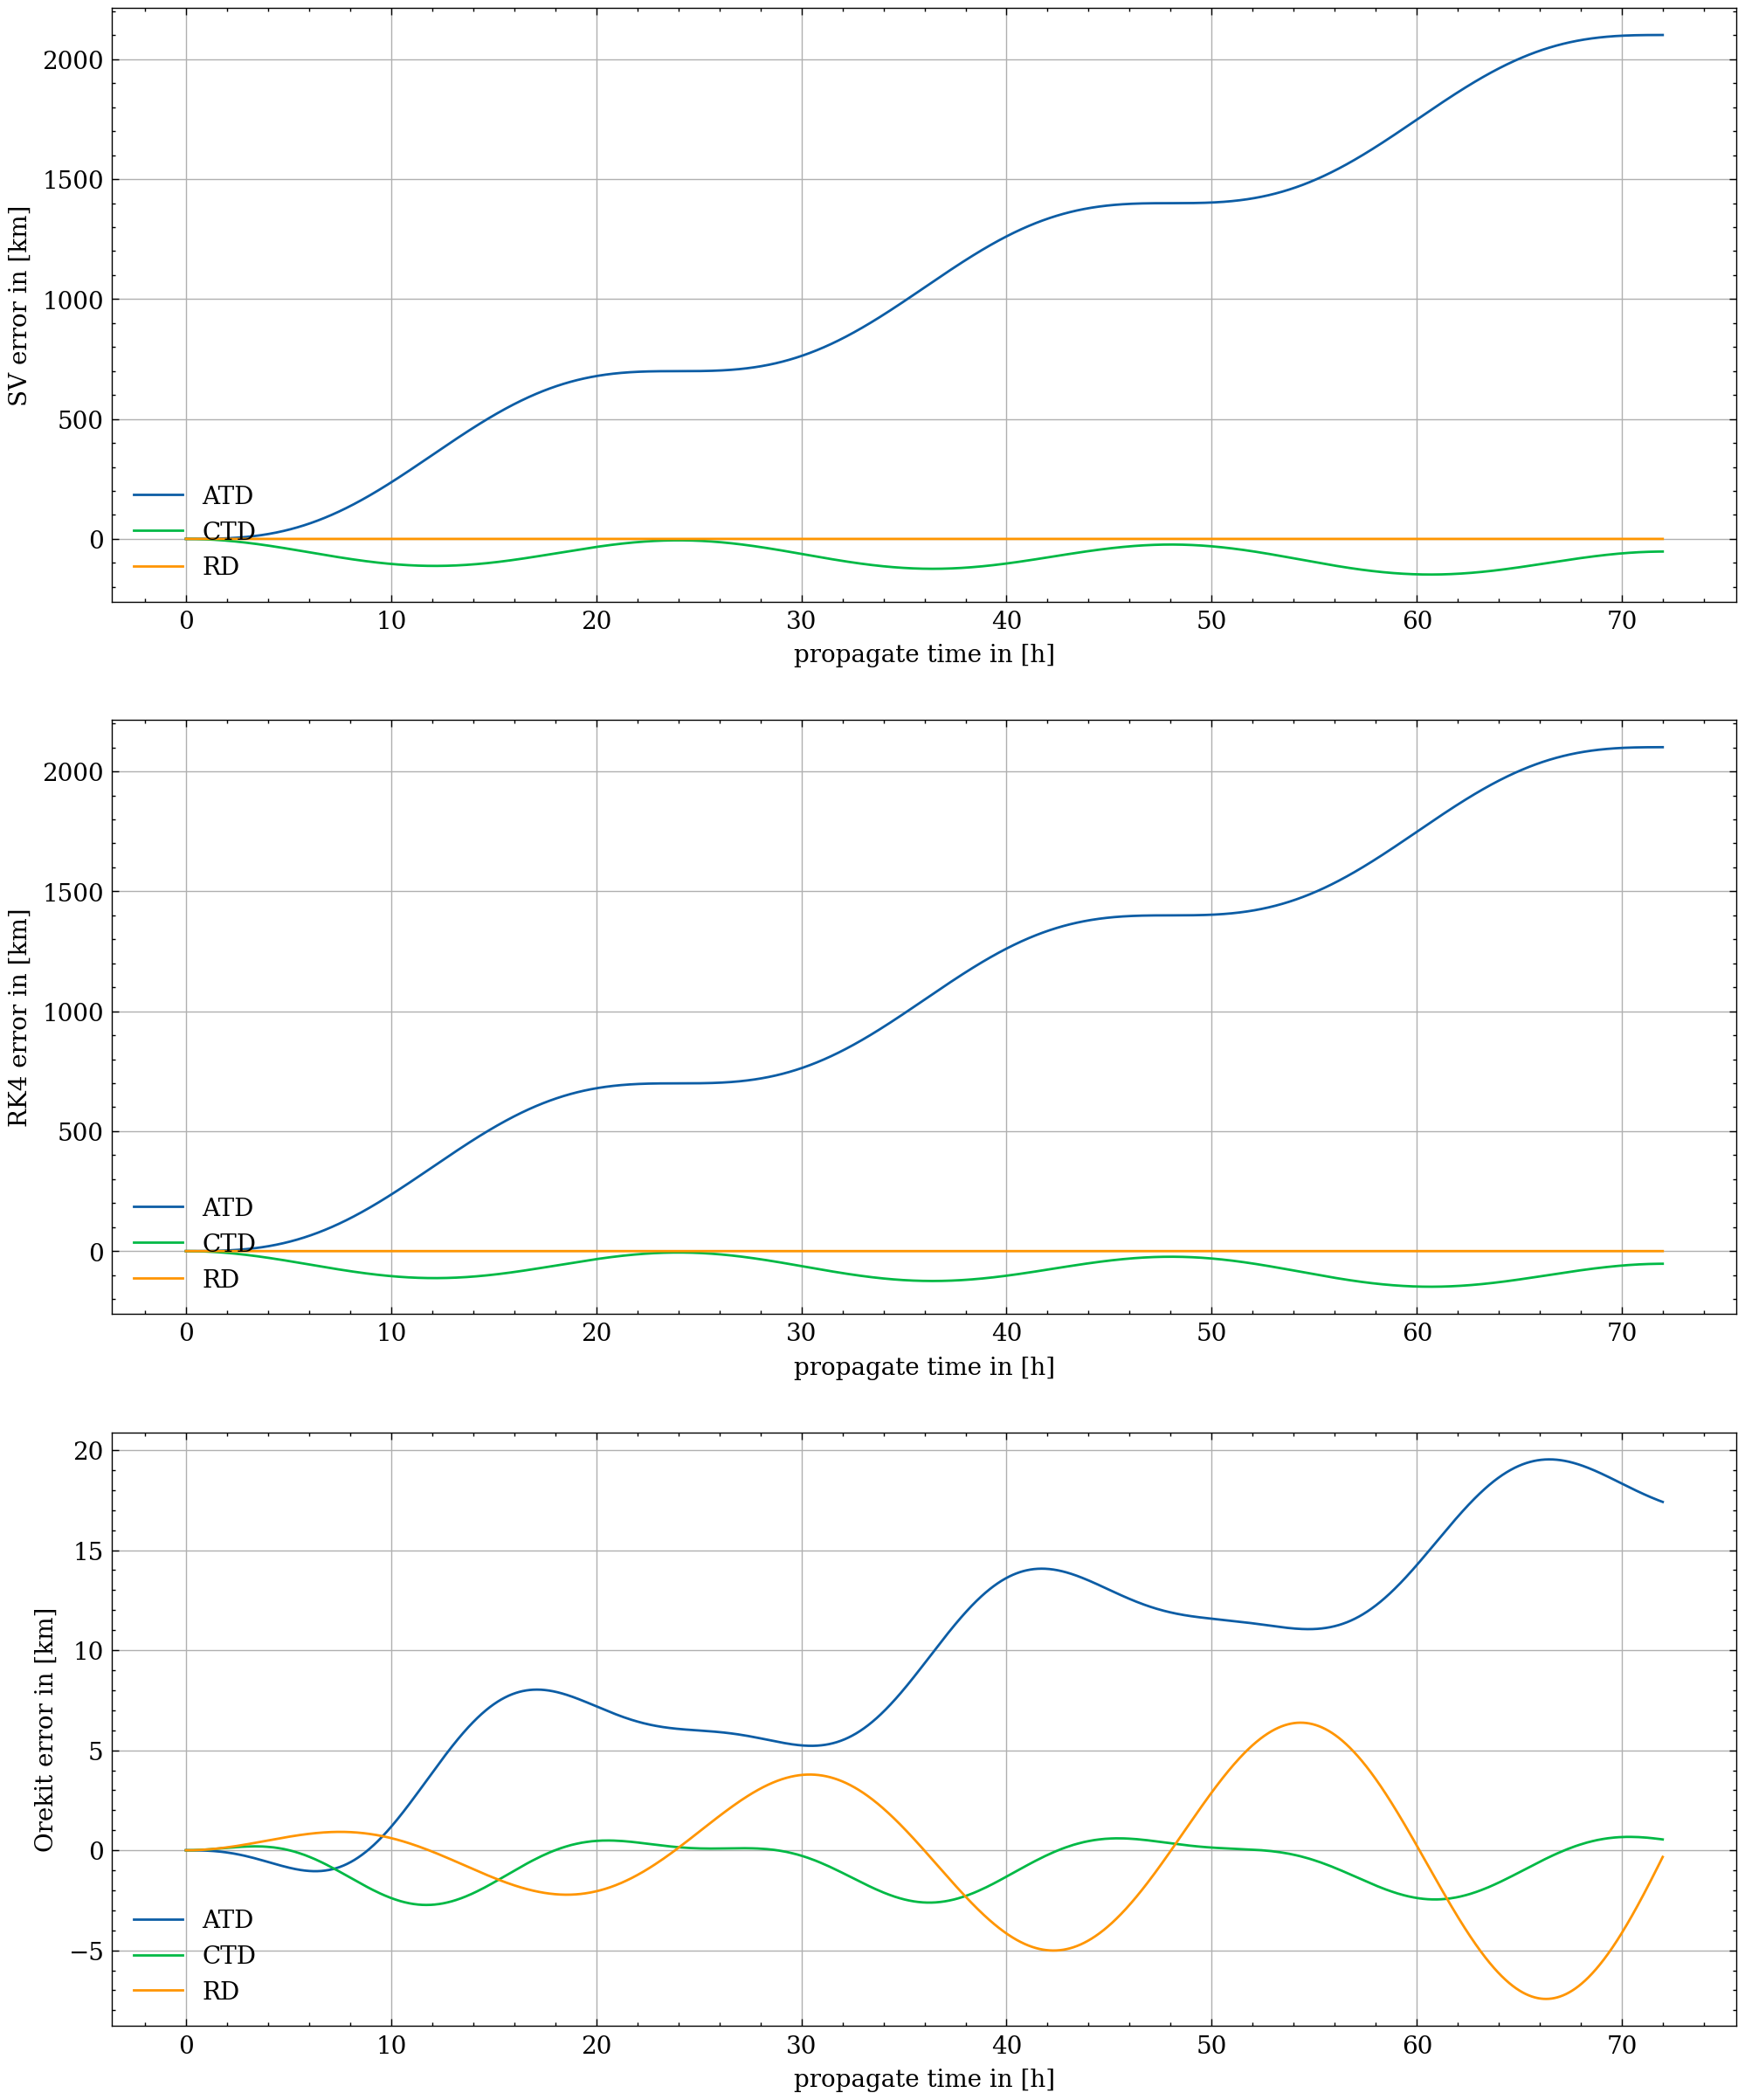

In [61]:

# compare the long-track error(ATD),cross-track error(CTD) and radial difference(RD)

errorSV = [[],[],[]] # 'ATD','CTD','RD'
errorRK4 = [[],[],[]] 
errorOrekit = [[],[],[]]
errortype = ['ATD','CTD','RD']

for i in range(nrange):
    for n in range(3):
        errorSV[n].append(es.errorEstimator(stateVec0[i],stateVec_SV[i])[errortype[n]]/1000)
        errorRK4[n].append(es.errorEstimator(stateVec0[i],stateVec_RK[i])[errortype[n]]/1000) 
        errorOrekit[n].append(es.errorEstimator(stateVec0[i],stateVec_orekit[i])[errortype[n]]/1000)
        
plt.figure(figsize=(12,15))
ax1 = plt.subplot(311)
for n in range(3):      
    plt.plot(trange[0:a]/3600,errorSV[n][0:a],label=errortype[n])
plt.xlabel('propagate time in [h]') 
plt.ylabel('SV error in [km]')
# plt.title('ISS - SV')
plt.legend(loc=3)
plt.grid(1)

ax2 = plt.subplot(312, sharex=ax1)
for n in range(3):
    plt.plot(trange[0:a]/3600,errorRK4[n][0:a],label=errortype[n])
plt.xlabel('propagate time in [h]') 
plt.ylabel('RK4 error in [km]')
# plt.title('ISS - RK4')
plt.legend(loc=3)
plt.grid(1)

ax3 = plt.subplot(313, sharex=ax1)
for n in range(3):      
    plt.plot(trange[0:a]/3600,errorOrekit[n][0:a],label=errortype[n])
plt.xlabel('propagate time in [h]') 
plt.ylabel('Orekit error in [km]')
# plt.title('ISS - orekit')
plt.grid(1)
plt.legend(loc=3)
plt.show()

In [33]:
stateVec_orekit_nodrag = np.loadtxt(r'./data/ISS/ISS_orekit_nodrag.out',skiprows=1,usecols=(1,2,3,4,5,6))
errorOrekit_nodrag = [[],[],[]]
for i in range(nrange):
    for n in range(3):
        errorOrekit_nodrag[n].append(es.errorEstimator(stateVec0[i],stateVec_orekit_nodrag[i])[errortype[n]]/1000)

a = 1080
plt.figure(figsize=(10,3))

n=0
plt.figure(figsize=(10,4))
plt.plot(trange[0:a]/3600,errorOrekit_nodrag[n][0:a],label='No drag',linestyle='-.')
plt.plot(trange[0:a]/3600,errorOrekit[n][0:a],label='With drag',linestyle='-')
    
plt.xlabel('propagate time in [h]') 
plt.ylabel('ATD in [km]')
plt.title('ISS - orekit')
plt.legend(loc=2)
plt.grid(1)
plt.show()


OSError: ./data/ISS/ISS_orekit_nodrag.out not found.

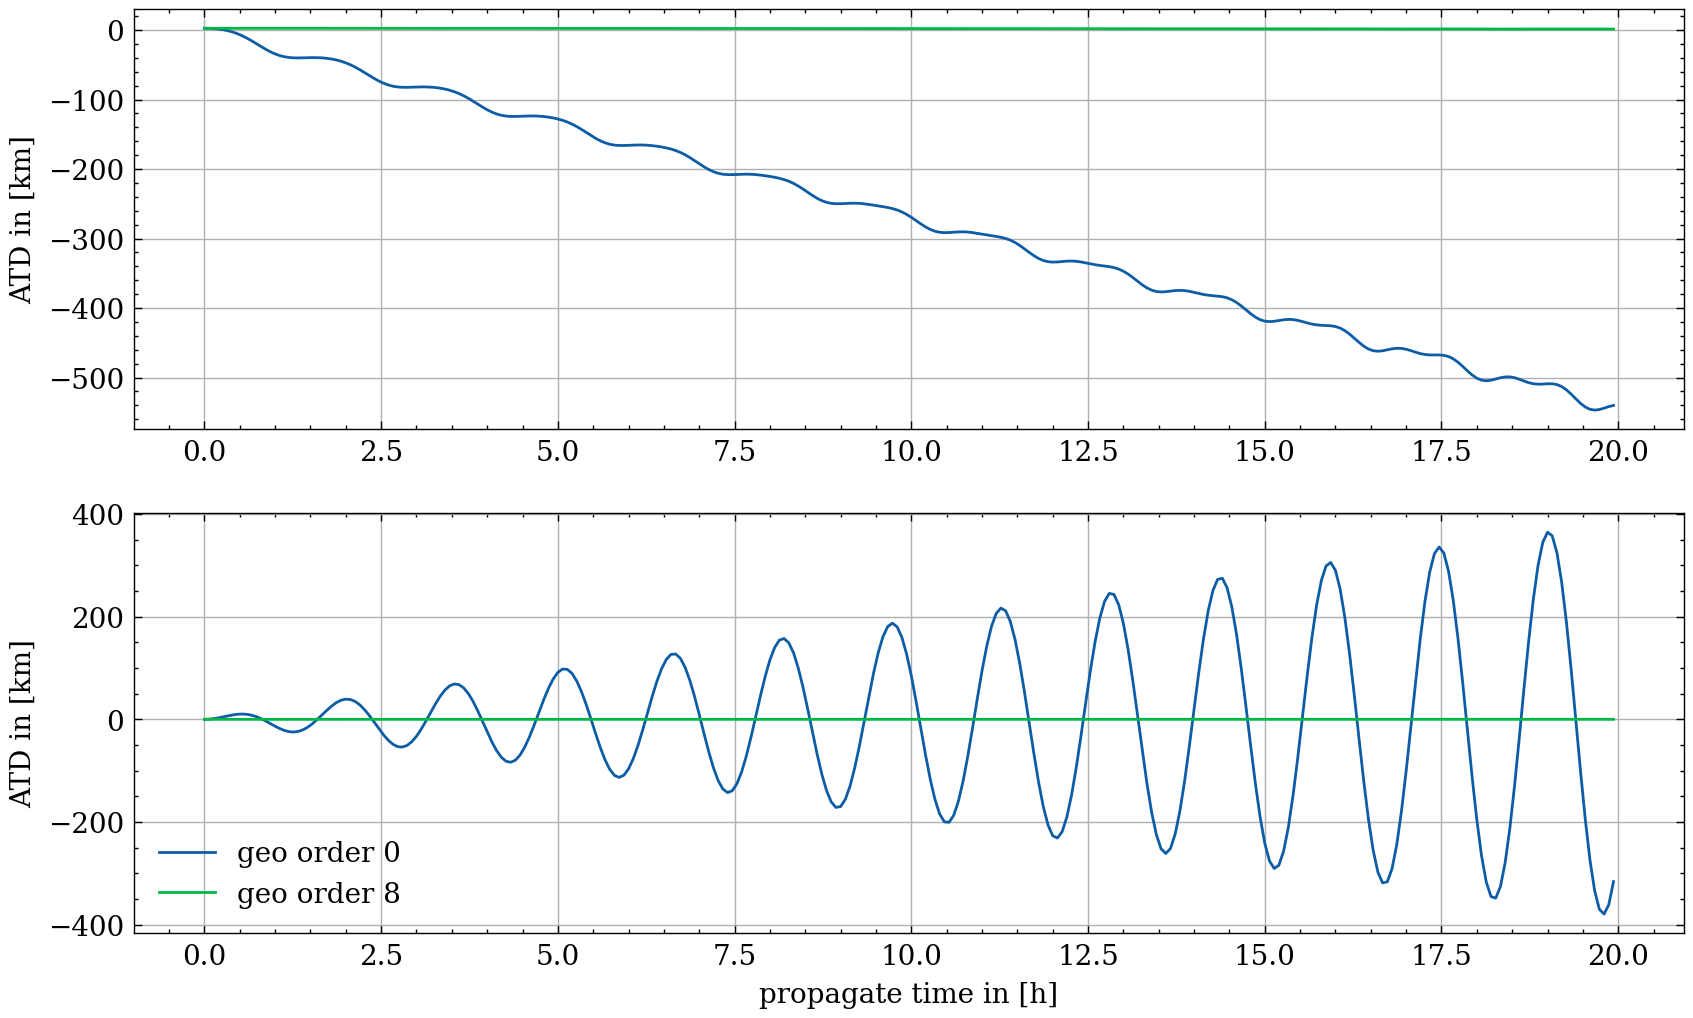

In [38]:
stateVec_orekit_geo0 = np.loadtxt(r'./data/ISS/ISS_orekit_geo0.out',skiprows=1,usecols=(1,2,3,4,5,6))
errorOrekit_geo0 = [[],[],[]]
for i in range(nrange):
    for n in range(3):
        errorOrekit_geo0[n].append(es.errorEstimator(stateVec0[i],stateVec_orekit_geo0[i])[errortype[n]]/1000)

a = 300
plt.figure(figsize=(10,6))

n=0
ax1 = plt.subplot(211)

plt.plot(trange[0:a]/3600,errorOrekit_geo0[n][0:a],label='geo order 0',linestyle='-')
plt.plot(trange[0:a]/3600,errorOrekit[n][0:a],label='geo order 8',linestyle='-')
plt.ylabel('ATD in [km]')
plt.grid(1)    

n=2
ax2 = plt.subplot(212, sharex=ax1)
plt.plot(trange[0:a]/3600,errorOrekit_geo0[n][0:a],label='geo order 0',linestyle='-')
plt.plot(trange[0:a]/3600,errorOrekit[n][0:a],label='geo order 8',linestyle='-')
plt.xlabel('propagate time in [h]') 
plt.ylabel('ATD in [km]')
plt.legend(loc=3)
plt.grid(1)

# plt.xlabel('propagate time in [h]') 
# plt.ylabel('ATD in [km]')
# plt.title('ISS - orekit')
# plt.legend(loc=3)
# plt.grid(1)
plt.show()

